# Blending Two Images

In [1]:
#importing Libraries
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

img1 = cv2.imread('data/3.jpg')
# color correction
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)



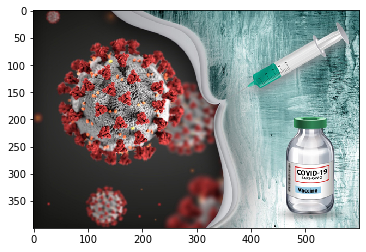

In [2]:
plt.imshow(img1)

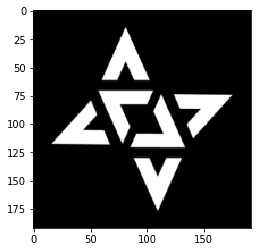

In [3]:
img2 = cv2.imread('data/4.png')
#color correction
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [4]:
img1.shape

(400, 600, 3)

In [5]:
img2.shape


(192, 192, 3)

In [6]:
# Blending Images of the same Size

img1_resized = cv2.resize(img1,(200,200))
img2_resized = cv2.resize(img2,(200,200))

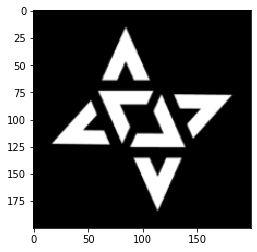

In [7]:
plt.imshow(img2_resized)

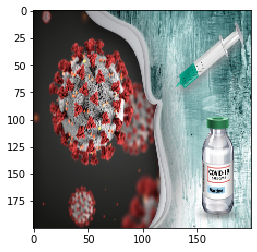

In [8]:
plt.imshow(img1_resized)

In [11]:
# addWeighted() method will only work when two image size is same.
blended = cv2.addWeighted(src1 = img1_resized, alpha = 0.5, src2 = img2_resized, beta = 0.1, gamma = 0)

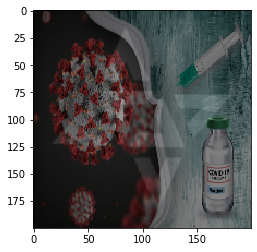

In [12]:
plt.imshow(blended)

# Overlay the small image to larger image..... without Blending

In [14]:
img1 = cv2.imread('data/3.jpg')
# color correction
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('data/4.png')
#color correction
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

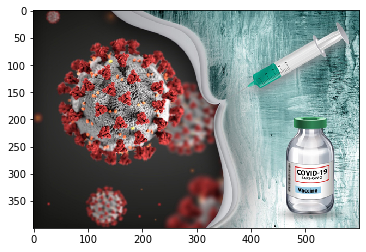

In [15]:
plt.imshow(img1)

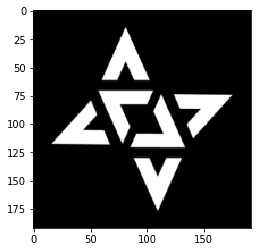

In [16]:
plt.imshow(img2)

In [17]:
print('Image 1 shape:', img1.shape)
print('Image 2 shape:', img2.shape)

Image 1 shape: (400, 600, 3)
Image 2 shape: (192, 192, 3)


In [19]:
large_image = img1
small_image = img2
small_image.shape

(192, 192, 3)

In [18]:
x_offset = 0
y_offset = 0

In [20]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

In [21]:
large_image[y_offset:y_end, x_offset:x_end] = small_image

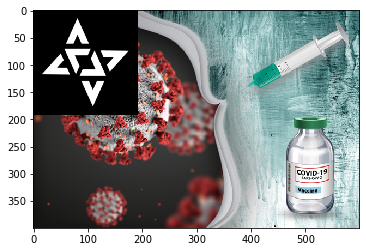

In [22]:
plt.imshow(large_image)

# Lets blend the two different size image.....

In [31]:
img1 = cv2.imread('data/7.jpg')
# color correction
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('data/6.png')
#color correction
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

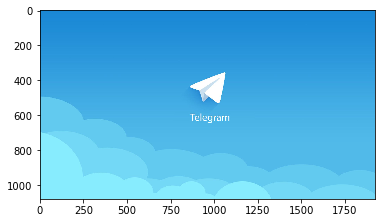

In [32]:
plt.imshow(img1)

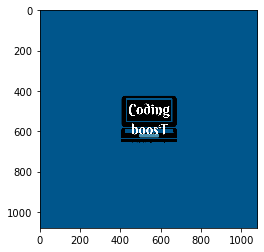

In [33]:
plt.imshow(img2)

In [34]:
print('image 1 shape:',img1.shape)
print('image 2 shape:',img2.shape)

image 1 shape: (1080, 1920, 3)
image 2 shape: (1080, 1080, 3)


In [35]:
x_offset = 0
y_offset = 0


In [36]:
x_end = 0 + img2.shape[1]
y_end = 0 + img2.shape[0]

In [37]:
roi = img1[y_offset:y_end, x_offset: x_end]

In [38]:
roi.shape

(1080, 1080, 3)

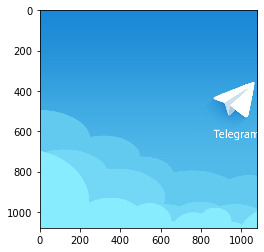

In [39]:
plt.imshow(roi)

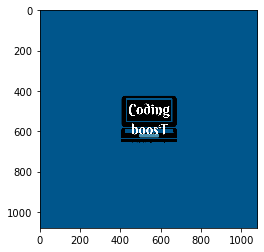

In [40]:
plt.imshow(img2)

In [41]:
img2_gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

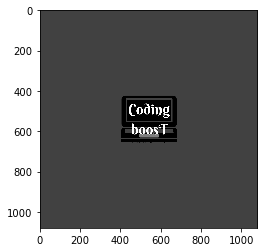

In [43]:
plt.imshow(img2_gray, cmap = 'gray')

In [45]:
# LETS INVERS THIS GRAY IMAGE

mask_inv = cv2.bitwise_not(img2_gray)

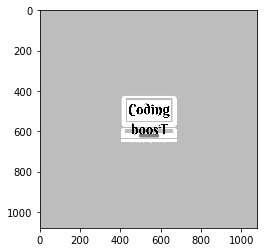

In [47]:
plt.imshow(mask_inv, cmap = 'gray')

In [48]:
mask_inv.shape

(1080, 1080)

In [49]:
# Adding channel to mask_inv
import numpy as np

In [51]:
bg = np.full(img2.shape,255,dtype = np.uint8)

In [52]:
bg.shape

(1080, 1080, 3)

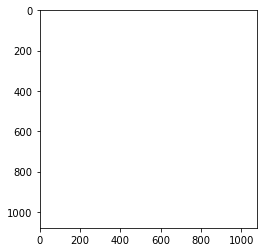

In [53]:
plt.imshow(bg)

In [54]:
bk = cv2.bitwise_or(bg,bg,mask = mask_inv)

In [55]:
bk.shape

(1080, 1080, 3)

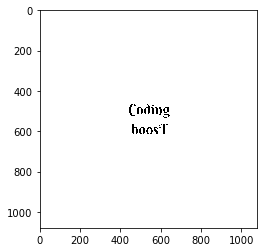

In [56]:
plt.imshow(bk)

In [57]:
fg =cv2.bitwise_or(img2,img2, mask = mask_inv)

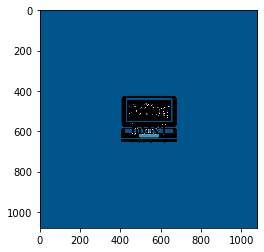

In [59]:
plt.imshow(fg)

In [60]:
final_roi = cv2.bitwise_or(roi,fg)

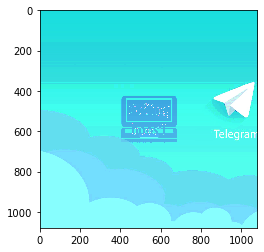

In [61]:
plt.imshow(final_roi)

In [62]:
large_image = img1
small_image = final_roi

In [64]:
large_image[y_offset:small_image.shape[0],x_offset:small_image.shape[0]] = small_image

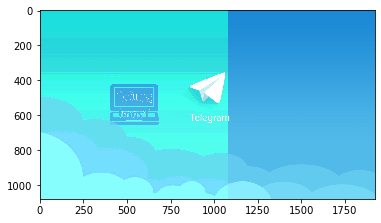

In [65]:
plt.imshow(large_image)